In [1]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import math
import librosa
import json
import librosa.display

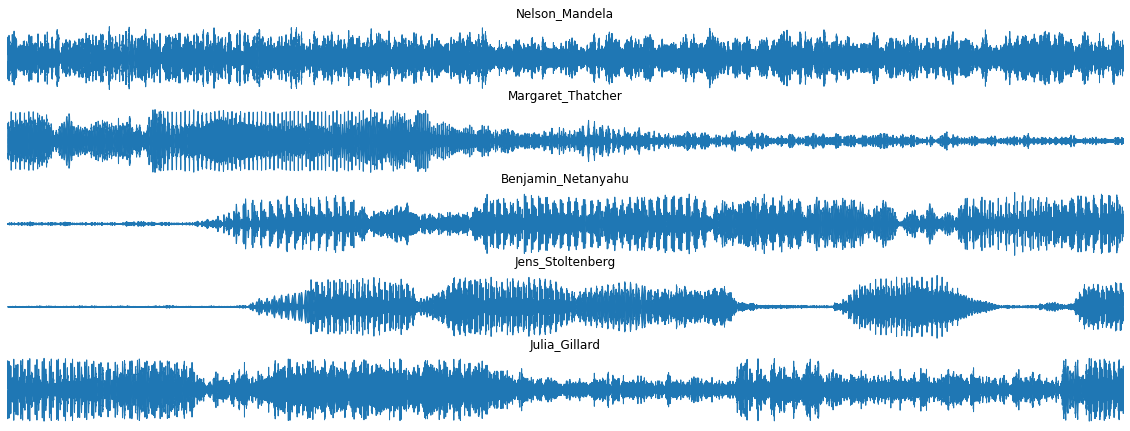

In [2]:
labels=['Nelson_Mandela','Margaret_Thatcher','Benjamin_Netanyahu','Jens_Stoltenberg','Julia_Gillard']
wav_path = '/Users/kshitijaupasham/Desktop/speaker-recognition/'
files=[]

for label in labels:
    files.append(wav_path+label+'/'+'1.wav')

sounds=[]
for file in files:
    signal, sample_rate = librosa.load(file, sr=22050)
    sounds.append(signal)
        
i = 1
fig = plt.figure(figsize=(20,15))
for n,sound in zip(labels,sounds):
    plt.subplot(10,1,i)
    librosa.display.waveplot(sound,sample_rate)
    plt.title(n.title())
    plt.axis('off')
    i += 1
plt.show()

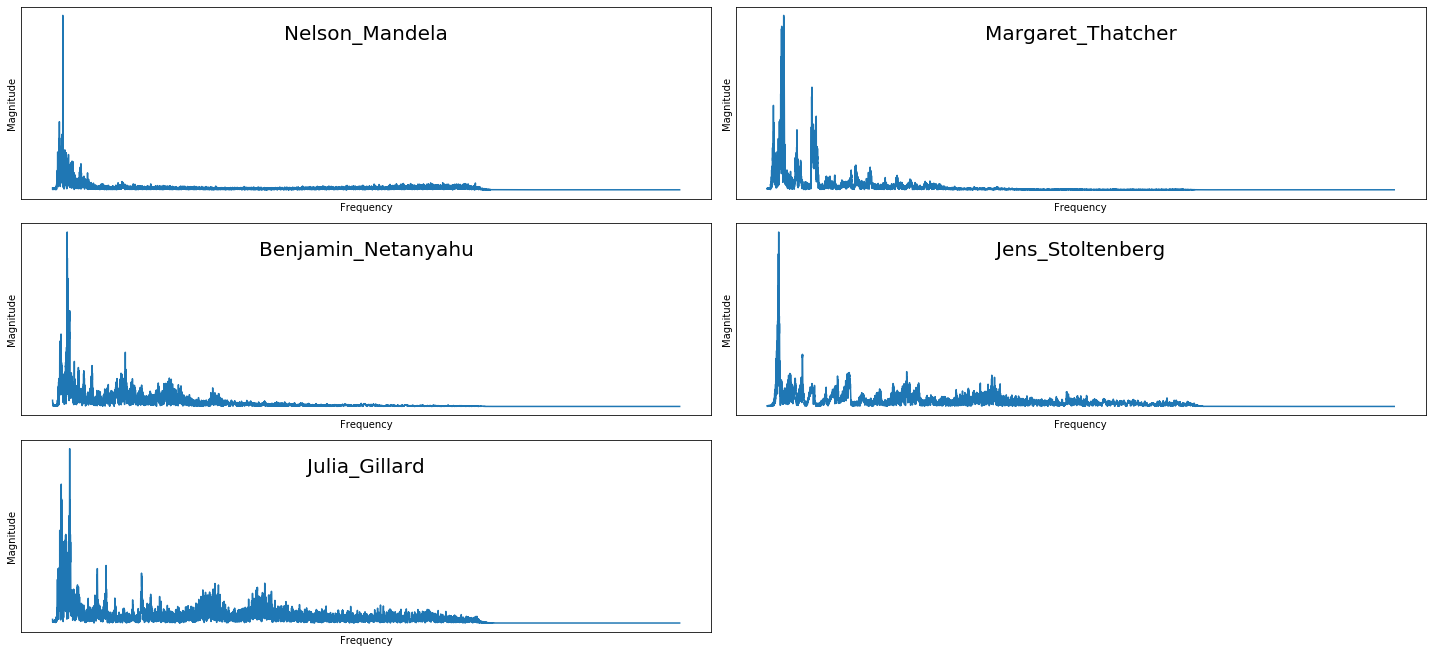

In [3]:
fig = plt.figure(figsize=(20,15))
i=1
for n,sound in zip(labels,sounds):
    plt.subplot(5,2,i)
    fft = np.fft.fft(sound)
    spectrum = np.abs(fft)
    f = np.linspace(0, sample_rate, len(spectrum))
    left_spectrum = spectrum[:int(len(spectrum)/2)]
    left_f = f[:int(len(spectrum)/2)]

    plt.plot(left_f, left_spectrum)
    plt.title(n.title(), y=0.8, fontsize=20)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    i += 1
    
plt.tight_layout()
plt.show()

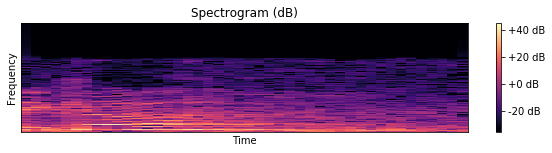

In [4]:
hop_length = 512 
n_fft = 2048 

stft = librosa.stft(sounds[1], n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=(10,2))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length,cmap='magma')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)");

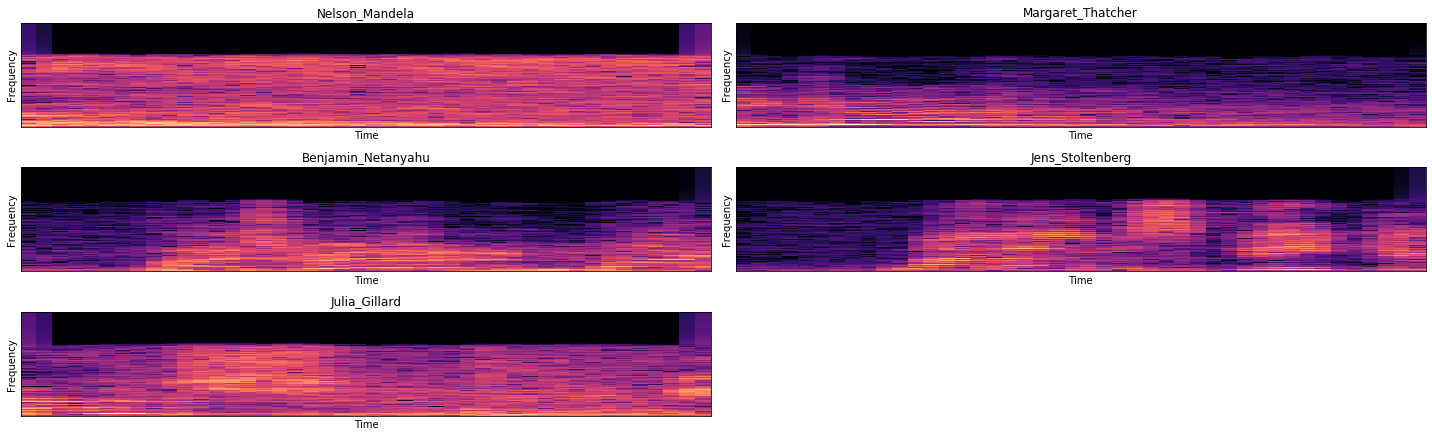

In [5]:
plt.figure(figsize=(20,10))
i=1

for n,sound in zip(labels,sounds):
    stft = librosa.stft(sound, n_fft=n_fft, hop_length=hop_length)
    spectrogram = np.abs(stft)
    log_spectrogram = librosa.amplitude_to_db(spectrogram)
    
    plt.subplot(5,2,i)
    librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length,cmap='magma')
    plt.title(n.title())
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    i=i+1

plt.tight_layout()
plt.show()

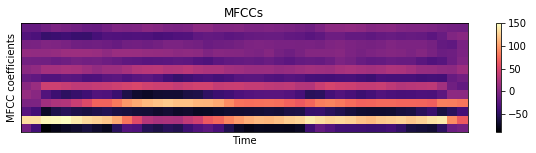

In [6]:
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

plt.figure(figsize=(10,2))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length,cmap='magma')
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
plt.show()

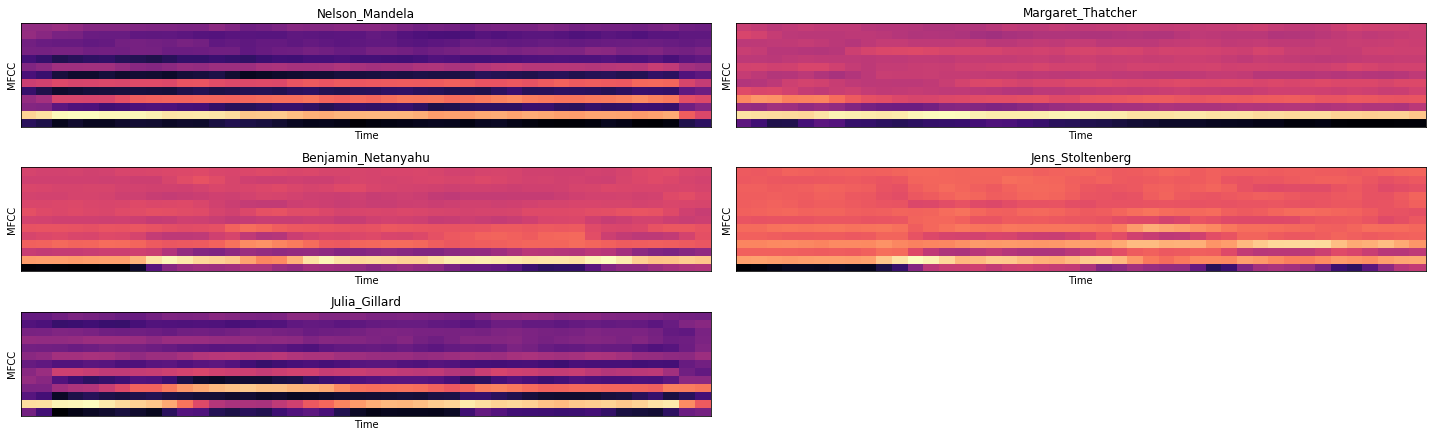

In [7]:
plt.figure(figsize=(20,10))
i=1
for n,sound in zip(labels,sounds):
    plt.subplot(5,2,i)
    MFCCs = librosa.feature.mfcc(sound, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
    librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length,cmap='magma')

    plt.title(n.title())
    plt.xlabel("Time")
    plt.ylabel("MFCC")
    i=i+1

plt.tight_layout()
plt.show()

In [8]:
samples_per_audio = sample_rate * 1
num_mfcc=13
num_segments=10

data = {
    "mapping": [],
    "labels": [],
    "mfcc": []
}

samples_per_segment = int(samples_per_audio / num_segments)
num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

In [9]:
for i, (directory_path, _, filename) in enumerate(os.walk(wav_path)):
    if directory_path is not wav_path:
        label = directory_path.split("/")[-1]
        data["mapping"].append(label)
        print("Processing: {}".format(label))

        for f in filename:
            file_path = os.path.join(directory_path, f)
            signal, sample_rate = librosa.load(file_path, sr=sample_rate)
            
            for d in range(num_segments):
                start = samples_per_segment * d
                finish = start + samples_per_segment
                mfcc = librosa.feature.mfcc(signal[start:finish],
                                            sample_rate,
                                            n_mfcc=num_mfcc,
                                            n_fft=n_fft,
                                            hop_length=hop_length)
                mfcc=mfcc.T
                
                if len(mfcc) == num_mfcc_vectors_per_segment:
                    data["mfcc"].append(mfcc.tolist())
                    data["labels"].append(i-1)

Processing: Jens_Stoltenberg
Processing: Margaret_Thatcher
Processing: Julia_Gillard
Processing: Nelson_Mandela
Processing: Benjamin_Netanyahu


In [10]:
with open("speaker_data.json", "w") as file:
    json.dump(data, file)